Now that we have added synthesised data to our data set where feature and response variable values come from the same year, we will now do the same to the data where there is a three year gap between crime rate and attribute values, once again using SMOTE.
In this case, as we do not have response variable values for the test set, we will run only obtain synthesised data for the train set.

In [1]:
import imblearn
from imblearn.over_sampling import SMOTE
import numpy as np
import pandas as pd
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder


In [2]:
Test = pd.read_csv('/Users/alyzehjiwani/Downloads/Data/Final Data Used/Crime_Data_Year_Gap_Test.csv')
Train = pd.read_csv('/Users/alyzehjiwani/Downloads/Data/Final Data Used/Crime_Data_Year_Gap_Train.csv')
Train = Train.drop('Unnamed: 0',axis = 1)
Test = Test.drop('Unnamed: 0',axis = 1)

We will merge the two sets so that we dont have to run the SMOTE process twice, we dshould just be sure to remember that the train set is all the data points from the year 2019n onwards.

In [10]:
C_Rate_Int = []
for i in range(len(Train)):
    if (Train['C_Rate'][i] == 'Very Low'):
        C_Rate_Int.append(0)
    if (Train['C_Rate'][i] == 'Low'):
        C_Rate_Int.append(1)
    if (Train['C_Rate'][i] == 'Medium'):
        C_Rate_Int.append(2)
    if (Train['C_Rate'][i] == 'High'):
        C_Rate_Int.append(3)
    if (Train['C_Rate'][i] == 'Very High'):
        C_Rate_Int.append(4)

Train['C_Rate_Int'] = C_Rate_Int

In [11]:
Train_1 = Train.values

Now we split the data into the independent features and the dependent variable

In [13]:
Train_y = Train_1[:,-1]
Train_X = np.delete(Train_1,[3,-1],axis = 1)

Now we label encode the target variable and summarise the distribution of our class values

In [14]:
Train_y = LabelEncoder().fit_transform(Train_y)

In [15]:
counter = Counter(Train_y)
for k,v in counter.items():
    per = v/len(Train_y)*100
    print('Class=%d, n=%d (%.3f%%)' % (k,v,per))

Class=0, n=57 (8.143%)
Class=3, n=177 (25.286%)
Class=2, n=192 (27.429%)
Class=1, n=162 (23.143%)
Class=4, n=112 (16.000%)


Now we plot the distribution of the classes

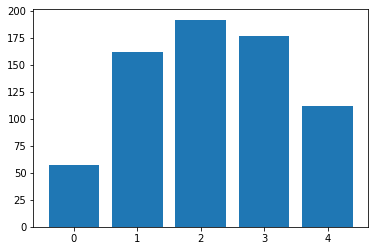

In [16]:
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

Now we will apply SMOTE, which will over sample the different levels of Crime Rate to have the same number of examples as the the Crime Rate level withy the highest number of data points. In this case that would be the C_Rate level corresponding to the class value of 2.

In [17]:
oversample = SMOTE()
Train_X,Train_y = oversample.fit_resample(Train_X,Train_y)

In [18]:
counter = Counter(Train_y)
for k,v in counter.items():
    per = v/len(Train_y)*100
    print('Class=%d, n=%d (%.3f%%)' % (k,v,per))


Class=0, n=192 (20.000%)
Class=3, n=192 (20.000%)
Class=2, n=192 (20.000%)
Class=1, n=192 (20.000%)
Class=4, n=192 (20.000%)


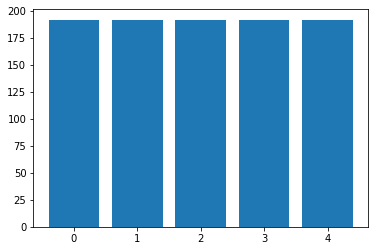

In [19]:
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [22]:
colnames = Train.columns.values
colnames

array(['Year', 'N_ID', 'Pop', 'C_Rate', 'Ad_Ed', 'Child_Care',
       'Com_House', 'Emp_Res', 'Sub_Trt', 'Trans_House', 'Recreation',
       'Inflation', 'NIA', 'C_Rate_Int'], dtype=object)

In [23]:
X_names = ['Year', 'N_ID', 'Pop', 'Ad_Ed', 'Child_Care',
       'Com_House', 'Emp_Res', 'Sub_Trt', 'Trans_House', 'Recreation',
       'Inflation', 'NIA']

In [24]:
SMOTE_data = pd.DataFrame(Train_X, columns = X_names)
SMOTE_data

,Year,N_ID,Pop,Ad_Ed,Child_Care,Com_House,Emp_Res,Sub_Trt,Trans_House,Recreation,Inflation,NIA
0,2014.0,97.000000,11197.333377,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,1.91,0.000000
1,2014.0,27.000000,25528.887749,0.000000,0.0,4.000000,1.000000,0.000000,0.0,0.000000,1.91,1.000000
2,2014.0,38.000000,14298.667753,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.000000,1.91,0.000000
3,2014.0,31.000000,13508.443828,0.000000,0.0,48.000000,0.000000,0.000000,0.0,0.000000,1.91,0.000000
4,2014.0,16.000000,22787.557567,0.000000,46.0,0.000000,0.000000,0.000000,0.0,0.000000,1.91,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
955,2018.0,32.679937,18495.306731,1.669984,0.0,1.995023,1.669984,0.000000,0.0,0.000000,2.27,0.000000
956,2018.0,118.062242,29022.287218,1.062242,0.0,14.502067,3.000000,0.000000,0.0,0.000000,2.27,0.000000
957,2018.0,109.149515,19328.014942,1.110014,0.0,10.141025,2.110014,0.110014,0.0,1.210152,2.27,0.889986
958,2018.0,99.527753,25979.751714,0.000000,0.0,0.000000,0.000000,0.794097,0.0,0.205903,2.27,0.000000


In [25]:
SMOTE_data['C_Rate'] = Train_y

In [26]:
SMOTE_data

,Year,N_ID,Pop,Ad_Ed,Child_Care,Com_House,Emp_Res,Sub_Trt,Trans_House,Recreation,Inflation,NIA,C_Rate
0,2014.0,97.000000,11197.333377,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,1.91,0.000000,0
1,2014.0,27.000000,25528.887749,0.000000,0.0,4.000000,1.000000,0.000000,0.0,0.000000,1.91,1.000000,3
2,2014.0,38.000000,14298.667753,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.000000,1.91,0.000000,2
3,2014.0,31.000000,13508.443828,0.000000,0.0,48.000000,0.000000,0.000000,0.0,0.000000,1.91,0.000000,3
4,2014.0,16.000000,22787.557567,0.000000,46.0,0.000000,0.000000,0.000000,0.0,0.000000,1.91,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,2018.0,32.679937,18495.306731,1.669984,0.0,1.995023,1.669984,0.000000,0.0,0.000000,2.27,0.000000,4
956,2018.0,118.062242,29022.287218,1.062242,0.0,14.502067,3.000000,0.000000,0.0,0.000000,2.27,0.000000,4
957,2018.0,109.149515,19328.014942,1.110014,0.0,10.141025,2.110014,0.110014,0.0,1.210152,2.27,0.889986,4
958,2018.0,99.527753,25979.751714,0.000000,0.0,0.000000,0.000000,0.794097,0.0,0.205903,2.27,0.000000,4


In [28]:
SMOTE_data.to_csv('//Users/alyzehjiwani/Downloads/Data/Final Data Used/Year_Gap_SMOTE_Train_data.csv')

Now that we have our new dataset with our synthesised data we will rerun our models to see if there is any change in our model effectiveness.